In [118]:
import csv
import numpy as np
from datetime import datetime
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
file = pd.read_csv('C:\\Users\\Pratik\\Desktop\\Python Data\\Data for Final Project\\Crime_Report_Boston.csv', low_memory=False)
df = file [['COMPNOS','Month','Year']]
df1 = df.groupby('Year').apply(lambda x : x.COMPNOS.nunique())
df1

Year
2012    43186
2013    87052
2014    88058
2015    37501
dtype: int64

In [120]:
data_file = file[['INCIDENT_TYPE_DESCRIPTION', 'FROMDATE', 'WEAPONTYPE', 'Shooting', 'Year', 'Month', 'DAY_WEEK', 'STREETNAME', 'XSTREETNAME', 'Location']]

In [121]:
data_file.FROMDATE = pd.to_datetime(data_file.FROMDATE)
data_file['TIME OF INCIDENT'] = [x.time() for x in data['FROMDATE']]

C:\Users\Pratik\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [122]:
data_file.head()

,INCIDENT_TYPE_DESCRIPTION,FROMDATE,WEAPONTYPE,Shooting,Year,Month,DAY_WEEK,STREETNAME,XSTREETNAME,Location,TIME OF INCIDENT
0,RESIDENTIAL BURGLARY,2012-07-08 06:00:00,Other,No,2012,7,Sunday,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)",06:00:00
1,AGGRAVATED ASSAULT,2012-07-08 06:03:00,Firearm,Yes,2012,7,Sunday,HOWARD AV,NaN,"(42.31684135, -71.07458456)",06:03:00
2,ROBBERY,2012-07-08 06:26:00,Firearm,No,2012,7,Sunday,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)",06:26:00
3,COMMERCIAL BURGLARY,2012-07-08 06:56:00,Other,No,2012,7,Sunday,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)",06:56:00
4,ROBBERY,2012-07-08 07:15:00,Firearm,No,2012,7,Sunday,COLLINS ST,NaN,"(42.27051636, -71.11989955)",07:15:00


In [123]:
data_file['Time'] = data_file['TIME OF INCIDENT'].astype(str).convert_objects(convert_numeric=True)

C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [124]:
data_file['HOUR'], data_file['MINUTES'], data_file['SECONDS'] = zip(*data['Time'].apply(lambda x: x.split(':', 3)))
data_file.head()

C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,INCIDENT_TYPE_DESCRIPTION,FROMDATE,WEAPONTYPE,Shooting,Year,Month,DAY_WEEK,STREETNAME,XSTREETNAME,Location,TIME OF INCIDENT,Time,HOUR,MINUTES,SECONDS
0,RESIDENTIAL BURGLARY,2012-07-08 06:00:00,Other,No,2012,7,Sunday,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)",06:00:00,06:00:00,06,00,00
1,AGGRAVATED ASSAULT,2012-07-08 06:03:00,Firearm,Yes,2012,7,Sunday,HOWARD AV,NaN,"(42.31684135, -71.07458456)",06:03:00,06:03:00,06,03,00
2,ROBBERY,2012-07-08 06:26:00,Firearm,No,2012,7,Sunday,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)",06:26:00,06:26:00,06,26,00
3,COMMERCIAL BURGLARY,2012-07-08 06:56:00,Other,No,2012,7,Sunday,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)",06:56:00,06:56:00,06,56,00
4,ROBBERY,2012-07-08 07:15:00,Firearm,No,2012,7,Sunday,COLLINS ST,NaN,"(42.27051636, -71.11989955)",07:15:00,07:15:00,07,15,00


In [125]:
df2 = data_file[['INCIDENT_TYPE_DESCRIPTION','STREETNAME', 'HOUR', 'DAY_WEEK']]
df2['HOUR'] = df2['HOUR'].astype('int64')
df2 = df2.groupby(['INCIDENT_TYPE_DESCRIPTION','STREETNAME'], as_index= False)
df2.head(5)

C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,INCIDENT_TYPE_DESCRIPTION,STREETNAME,HOUR,DAY_WEEK
0,RESIDENTIAL BURGLARY,ABERDEEN ST,6,Sunday
1,AGGRAVATED ASSAULT,HOWARD AV,6,Sunday
2,ROBBERY,JERSEY ST,6,Sunday
3,COMMERCIAL BURGLARY,COLUMBIA RD,6,Sunday
4,ROBBERY,COLLINS ST,7,Sunday
5,ROBBERY,SYDNEY ST,7,Sunday
6,ROBBERY,REGENT ST,7,Sunday
7,SIMPLE ASSAULT,WASHINGTON ST,7,Sunday
8,MedAssist,FANEUIL ST,7,Sunday
9,MedAssist,RIVER ST,8,Sunday


In [126]:
df3 = df2 [['STREETNAME', 'HOUR', 'DAY_WEEK']]

In [127]:
plt.figure(figsize=(15,20))

In [128]:
sns.set_context("poster",)

In [129]:
ax1 = plt.subplot2grid((2,1),(0,0))

In [130]:
WeekGraph = pd.DataFrame(data_file["DAY_WEEK"].value_counts())
WeekGraph

,DAY_WEEK
Friday,42031
Thursday,38627
Saturday,38446
Wednesday,38392
Monday,38256
Tuesday,37911
Sunday,34393


In [131]:

sns.barplot(x = WeekGraph.index, y = "DAY_WEEK", data = WeekGraph, palette="RdBu_r" , order=['Sunday', 'Monday','Tuesday','Wednesday',
                                                                       'Thursday','Friday','Saturday'])

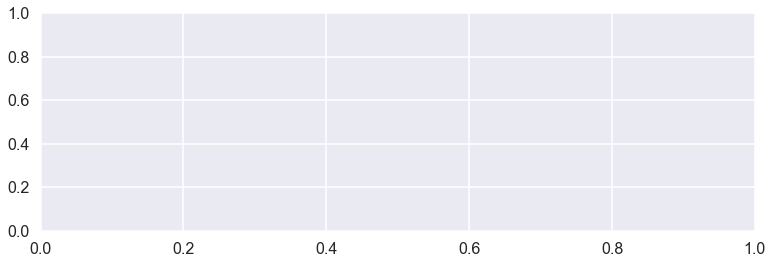

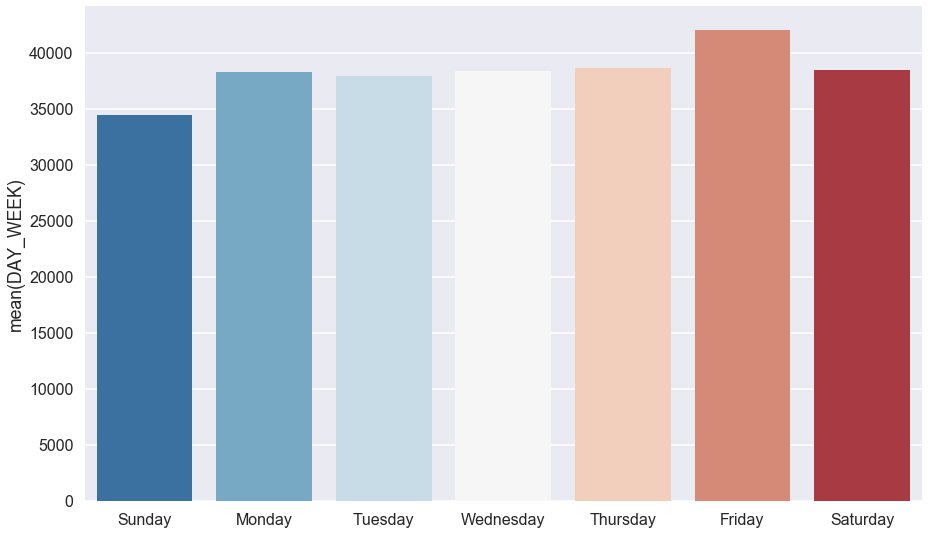

In [132]:
plt.show()

In [138]:
ax2 =  plt.subplot2grid((2,1),(1,0))
sns.countplot(x = "DAY_WEEK", hue="WEAPONTYPE", data = data_file, palette="BuGn_d", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
# sns.axlabel("","")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=10)

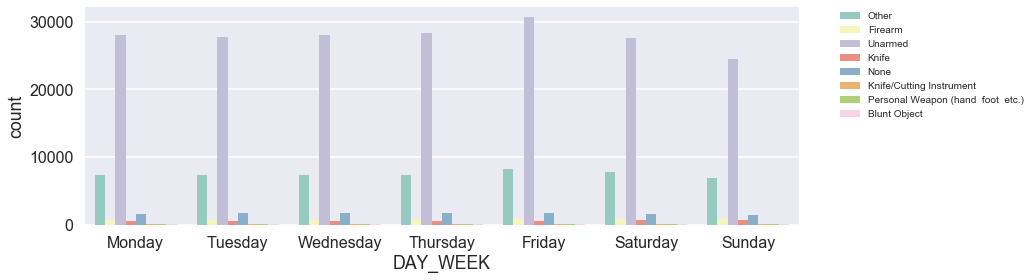

In [136]:
plt.show()